**General instructions:** 
- This task is intended to be a general DS assessment. If you have applied for an Operational Research role, please contact your recruiter. 
- Please, explain any step or though that you think may be important to evaluate your task. 
- The expected programming language is **python**

- For the sake of the review, we **strongly prefer** to receive back a jupyter notebook containing all the code, comments and thoughts. This notebook should work from end to end, so we can `restart and run all` or  go through it, cell by cell, if we needed to do so.

In [1]:
# Move to the correct directory
import os
import sys

module_path = os.path.abspath(os.path.join(".."))
os.chdir(module_path)

In [2]:
# Import all necessary code
# for better visualisation of the results
import warnings

from IPython.display import display, Markdown

from tesco.data.preprocessing import load_preprocessed_data
from tesco.exploration.inspection import distribution_view, top_correlated_features

In [3]:
# for better visualization of the results
warnings.filterwarnings("ignore")

# TESCO STORES Dataset

At Tesco, the location of a retail store plays a huge role in its commercial success. Our Stores Team use various data sources to better understand the potential of candidate locations for new stores in the UK. They need data science help in designing a model that can predict the future sales **[normalised_sales]** of a store based on location characteristics. Your task is to examine the provided dataset and answer the questions below.

Dataset files
* `tesco-dataset/train.csv`
* `tesco-dataset/test.csv`

Columns
* `location_id`: id of Tesco property location
* `normalised_sales`: normalised sales value of Tesco store
* `crime_rate`: crime rate in the area (higher means more crime)
* `household_size`: mean household size in the area
* `household_affluency`: mean household affluency in the area (higher means more affluent)
* `public_transport_dist`: index of public transport availability in the area
* `proportion_newbuilds`: proportion of newly built property in the area
* `property_value`: average property value in the area
* `commercial_property`: percentage of commercial properties in the area
* `school_proximity`: average school proximity in the area
* `transport_availability`: availability of different transport
* `new_store`: new Tesco store opened recently
* `proportion_nonretail`: proportion of non-retail commercial properties in the area
* `competitor_density`: density of competitor retailers
* `proportion_flats`: proportion of blocks of flats in the area
* `county`: county code of the area

-------------

## Q1
Before diving into the modelling, you are given the dataset and the Stores Team expect you to come back with an analysis of the data and any concerns you may have about it. They would also like to know which other information you think would be useful to collect for future developments.

### The test set is very small

The test set contains 13 locations. The total data is composed of 333 locations. The dataset is not big to start with, but the size of the test set corresponds to ~4% of the data. Working with at least 10-15% of the data reserved for the test set is common practice. This is important to allow for statistically significant validation of the model, to have enough diversity of data to make the test reliable and to establish if the model is overfitting. However, [Question 3](#Q3) suggests that we are using the model to predict sales to this split of the data. Therefore, this is not a problem. 

### The test set is biased in relation to some relevant variables.

1. **Biased variables**: On a visual inspection ([Fig. 1](#Figure-1:)), the test set is notably biased in relation to `crime_rate`, `commercial_property` and `household_size`. The reason I have not performed any statistical analysis to evaluate this is that, as I have mentioned before, the test set is very small, so using statistical tests to detect bias here would not be very productive.
2. **`normalised_sales` missing:** There are no `normalised_sales` values for the test set.
If the idea is to use the model to predict the `normalised_sales` values in this dataset, as [Question 3](#Q3) suggests, that would not be a problem. However, the name “test” is normally used to refer to the dataset used to test the quality of the model, which would not be possible in this case. I assume that you have the correct expected values and you will compare them to my predicted values, so I perform other data splits to train and test a proposed model.

### Figure 1:

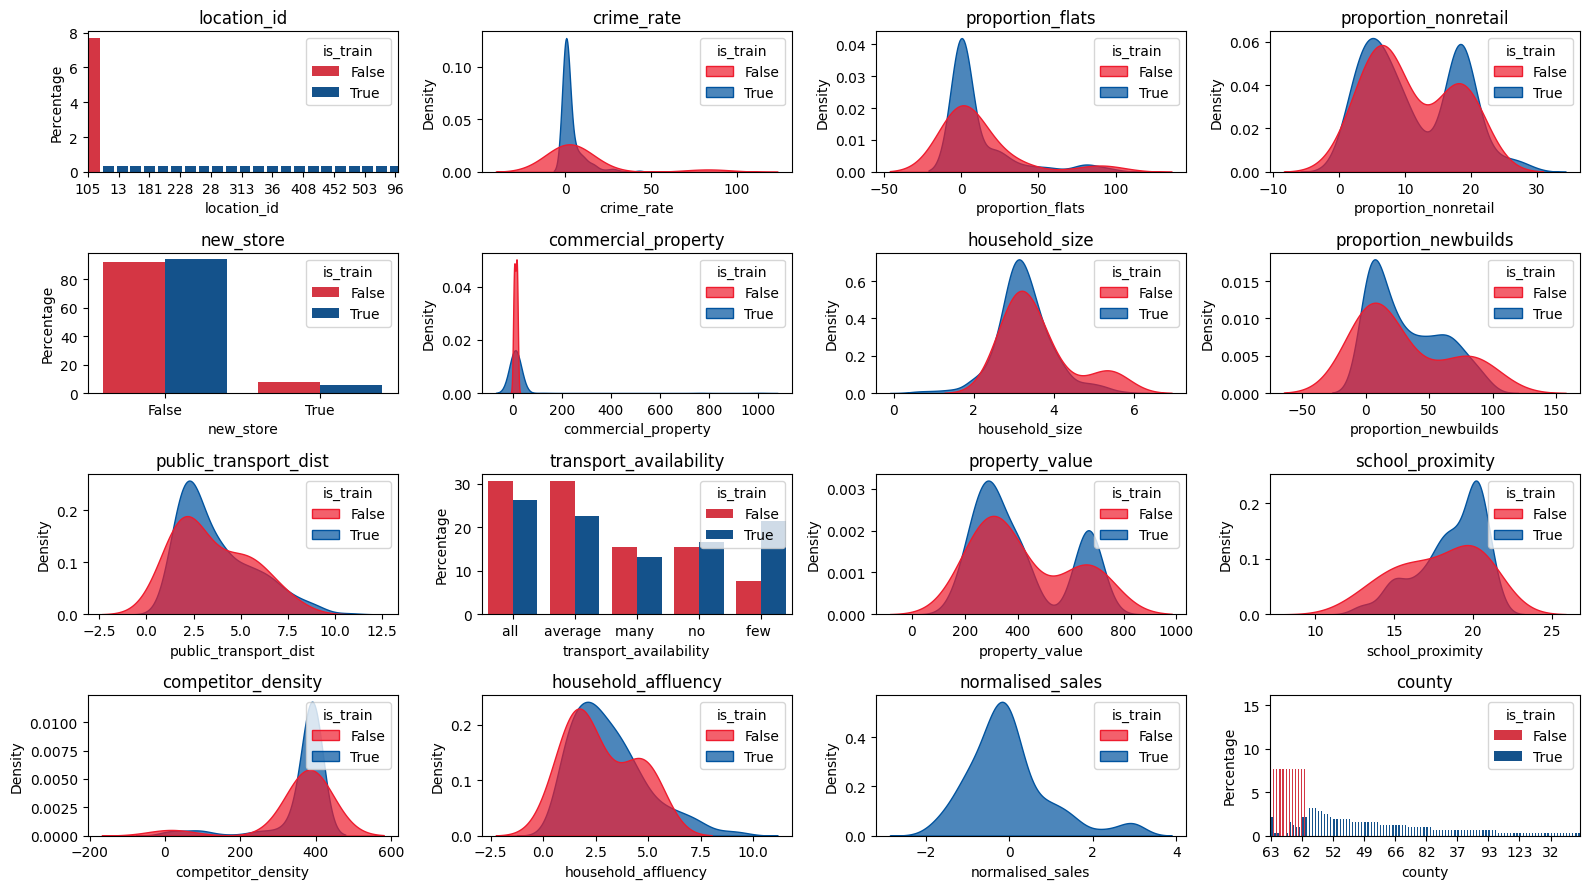

In [6]:
display(Markdown("### Figure 1:"))
df = load_preprocessed_data("tesco_dataset")
fig_1 = distribution_view(df)
# !!!!!!!!!! Location ID seems to be wrong (remove or fix) !!!!!!!!!!!!!!!!


### High frequency of zeros in some variables

| Variable | N | % |
| --- | --- | --- |
| `proportion_flats` | 248 | 74.5% |
| `proportion_newbuilds` | 26 | 7.8% |

I would like to confirm with them if these are missing values or actual zero numbers. It is not uncommon in the UK to have regions with only old buildings and no flats, so these could be real values. However, the proportion of regions with no flats seems to be excessive, so I would double-check that.

### The County Code is highly correlated to the target variable

The County code seems to be a linear function with noise from the County Code number, see [Fig. 2](#Figure-2:-Correlation-with-County-Code) and [Table 1](#Table-1:-Correlation-with-County-Code). Other key variables are also correlated to the County code. Notably, household affluence is an exponential function of the code. It looks like the code was designed from a table sorted by `normalised_sales`. Using this variable to train the model would give great results in a validation set (a sub-set of the train data used to measure the model's performance) but would not generalise to unseen counties. We shall exclude this variable from the training set. I would  also ask the Stores Team about how this happened.

I assume that the correlation between the other variables is done by design and is a feature of this (probably synthetic) dataset.
Therefore, I will not raise further questions about their correlations and behaviours.


# Table 1: Correlation with County Code

|                       |   Correlation with County Code |
|:----------------------|-------------------------------:|
| county_code           |                      1         |
| normalised_sales      |                      0.793919  |
| household_affluency   |                      0.611673  |
| household_size        |                      0.57991   |
| proportion_nonretail  |                      0.386911  |
| property_value        |                      0.350498  |
| crime_rate            |                      0.316289  |
| proportion_flats      |                      0.313049  |
| proportion_newbuilds  |                      0.312696  |
| school_proximity      |                      0.302263  |
| competitor_density    |                      0.251854  |
| public_transport_dist |                      0.208313  |
| commercial_property   |                      0.0732871 |

# Figure 2: Correlation with County Code

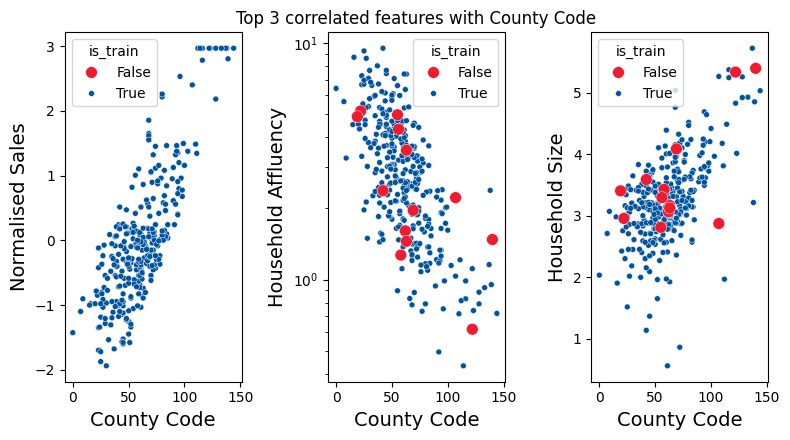

In [5]:
df["county_code"] = df["county"].astype("int")
fig, count_correlated_features = top_correlated_features(df, target="county_code", n_top=3)
display(Markdown("# Table 1: Correlation with County Code"))
display(Markdown(count_correlated_features.to_markdown()))
display(Markdown("# Figure 2: Correlation with County Code"))

# They would also like to know which other information you think would be useful to collect for future developments.
* Transform the normalized sales into a more tangible metric
* Type of store (extra, metro, express)
* competitor density per competitor

-------------

## Q2
Build a model that can predict store sales based on the provided area features. Please show how you developed the model and report how well your model is performing. ***Constraint:*** Please use Random Forest as the model family to solve this problem.

-------------

## Q3
The dataset contains a test set of potential store locations. Use your developed model to predict the sales value in these areas and explain what recommendations you would give to the Stores Team to use it. Use any tools that may help you to share your findings with product owners and other non-technical decision makers in the team. Complete this task by explaining how you would improve the current results.

-------------

## Masked Dataset

You are given the following small dataset, which has been completely masked for privacy reasons. Please train the best model you can come up with to predict the target variable `y` based on the features `x1` and `x2`. Explain every step you take. 

Assuming that this model will be used for making decisions involving important sums of money, provide any comments that you think you should be giving to the business as a technical expert.

Dataset files
* `masked_dataset/train.csv`